# Coursera Capstone project


## The Battle of Neighborhoods

### Load Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


In [2]:
geo_london = pd.read_csv('london.csv',sep = ';')
geo_london.shape

(33, 7)

In [3]:
geo_london.head()

,Area,Count of rents,Average,Crime rate,Population,latitude,longitude
0,City of London,20,2697,110,8760,51.512344,-0.090985
1,Barking and Dagenham,300,1186,71,201979,51.546483,0.129350
2,Barnet,1050,1417,56,379691,51.656923,-0.194925
3,Bexley,280,1049,46,242142,51.439933,0.154327
4,Brent,850,1539,71,324012,51.567281,-0.271057


In [4]:
geo = pd.DataFrame(geo_london)
geo.head()

,Area,Count of rents,Average,Crime rate,Population,latitude,longitude
0,City of London,20,2697,110,8760,51.512344,-0.090985
1,Barking and Dagenham,300,1186,71,201979,51.546483,0.129350
2,Barnet,1050,1417,56,379691,51.656923,-0.194925
3,Bexley,280,1049,46,242142,51.439933,0.154327
4,Brent,850,1539,71,324012,51.567281,-0.271057


In [5]:
geo.dtypes

Area               object
Count of rents      int64
Average             int64
Crime rate          int64
Population          int64
latitude          float64
 longitude        float64
dtype: object

In [6]:
geo = geo.rename({"Count of rents":"Count_of_rents","Crime rate":"Crime_rate"}, axis='columns') 
  
geo.head()


,Area,Count_of_rents,Average,Crime_rate,Population,latitude,longitude
0,City of London,20,2697,110,8760,51.512344,-0.090985
1,Barking and Dagenham,300,1186,71,201979,51.546483,0.129350
2,Barnet,1050,1417,56,379691,51.656923,-0.194925
3,Bexley,280,1049,46,242142,51.439933,0.154327
4,Brent,850,1539,71,324012,51.567281,-0.271057


### Get Londons coordinates from geolocator

In [7]:
address = 'London, England'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London, England are {}, {}.'.format(latitude, longitude))

C:\Users\DAIVA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of London, England are 51.5073219, -0.1276474.


In [8]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area in zip(geo['latitude'], geo[' longitude'], geo['Area']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
map_london

### Find best fitted neighborhood

#### Criteria:
##### 1. Rent price should be in the range of 1500 - 2100 pounds per month for two room apartment
##### 2. Crime rate should be no larger than 100 per thousand citizens
##### 3. The capacity of the rented apartment also should be more than 500 rooms for a better choice
##### 4. The population of the neighborhood can‘t be larger than 300000 citizens because of overcrowded
##### 5. This neighborhood should also have a couple of Italian restaurants and a movie theatre


In [9]:
geo_new = geo[(geo.Average >= 1500) & (geo.Crime_rate <= 100) & (geo.Population <= 300000) & (geo.Count_of_rents >= 500)]
geo_new.head(10)

,Area,Count_of_rents,Average,Crime_rate,Population,latitude,longitude
11,Hackney,630,1849,91,269009,51.551795,-0.064644
12,Hammersmith and Fulham,700,1865,98,179410,51.480000,-0.210000
18,Islington,960,2050,100,227692,51.538621,-0.102835
26,Richmond upon Thames,540,1704,50,194730,51.461305,-0.303771
29,Tower Hamlets,1080,1869,85,295236,51.520261,-0.029340


In [10]:
# create map of London using latitude and longitude values
map_london_filtred = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area in zip(geo_new['latitude'], geo_new[' longitude'], geo_new['Area']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london_filtred)  
    
map_london_filtred

### So we found 5 neighborhood that meet 4 of 5 criterias and now we use Foursquare API to find venues in these areas

#### We start with Hackney neighborhood index 11

In [11]:
CLIENT_ID = 'CVNQUGD221MLI52MXAQI2QMGGNMCUEPEHKBKFOZ1MLMSNEZC' # your Foursquare ID
CLIENT_SECRET = 'HU0ZZQQ5DFCHMF55A5XOVGJ4HDX43MS1D5FPXZNFDZH214VH' # your Foursquare Secret
VERSION = '20190419'# Foursquare API version
radius = 500
LIMIT = 250

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CVNQUGD221MLI52MXAQI2QMGGNMCUEPEHKBKFOZ1MLMSNEZC
CLIENT_SECRET:HU0ZZQQ5DFCHMF55A5XOVGJ4HDX43MS1D5FPXZNFDZH214VH


In [12]:
#define object'Hackney' index 11
neighborhood_latitude = geo.loc[11, 'latitude'] # neighborhood latitude value
neighborhood_longitude = geo.loc[11, ' longitude'] # neighborhood longitude value
neighborhood_name = geo.loc[11, 'Area'] # area name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Hackney are 51.55179529999999, -0.06464370000003328.


In [13]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display GET request URL

'https://api.foursquare.com/v2/venues/explore?&client_id=CVNQUGD221MLI52MXAQI2QMGGNMCUEPEHKBKFOZ1MLMSNEZC&client_secret=HU0ZZQQ5DFCHMF55A5XOVGJ4HDX43MS1D5FPXZNFDZH214VH&v=20190419&ll=51.55179529999999,-0.06464370000003328&radius=500&limit=250'

In [14]:
results = requests.get(url).json()
results # remove ';' if you want to see json data

{'meta': {'code': 200, 'requestId': '5cc2b5b1d03360002cc8f363'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hackney Central',
  'headerFullLocation': 'Hackney Central, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 51.55629530449999,
    'lng': -0.05742023169319037},
   'sw': {'lat': 51.547295295499985, 'lng': -0.07186716830687619}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aefe975f964a5205cda21e3',
       'name': 'Hackney Downs',
       'location': {'address': 'Downs Park Rd',
        'lat': 51.55420740358053,
        'lng': -0.06175518035888672,
        'labeledLatLngs': [{'label': 'display',
        

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
df_hackney = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_hackney = df_hackney.loc[:, filtered_columns]

# filter the category for each row
df_hackney['venue.categories'] = df_hackney.apply(get_category_type, axis=1)

# clean columns

df_hackney.columns = [col.split(".")[-1] for col in df_hackney.columns]
df_hackney.insert(0, 'neighborhood', 'Hackney')

print('{} venues were returned by Foursquare.'.format(df_hackney.shape[0]))
df_hackney.head(10)

23 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Hackney,Hackney Downs,Park,51.554207,-0.061755
1,Hackney,Hackney Downs Studios,Coworking Space,51.554663,-0.067156
2,Hackney,Yoga on the Lane,Yoga Studio,51.552830,-0.070041
3,Hackney,Parade,Breakfast Spot,51.549967,-0.063744
4,Hackney,The Well Garden,Yoga Studio,51.554617,-0.066698
5,Hackney,Hand of Glory,Pub,51.554595,-0.068260
6,Hackney,Healthy Stuff,Coffee Shop,51.548182,-0.065408
7,Hackney,Hash E8,Breakfast Spot,51.548310,-0.065455
8,Hackney,Coffee Is My Cup Of Tea,Café,51.548363,-0.067506
9,Hackney,Pembury Tavern,Pub,51.549472,-0.059394


In [17]:
map_hackney = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(df_hackney['lat'], df_hackney['lng'], df_hackney['name'], df_hackney['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='red',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_hackney) 
    
map_hackney

In [18]:
df_hackney['categories'].value_counts()

Pub                           5
Café                          3
Breakfast Spot                2
Yoga Studio                   2
Italian Restaurant            1
Restaurant                    1
Grocery Store                 1
Coffee Shop                   1
Furniture / Home Store        1
Music Venue                   1
Modern European Restaurant    1
Coworking Space               1
Gourmet Shop                  1
Brewery                       1
Park                          1
Name: categories, dtype: int64

### Now create dataframes for other selected neighborhoods

#### Hammersmith and Fulham index 12

In [19]:
#define object 'Hammersmith and Fulham' index 12
neighborhood_latitude = geo.loc[12, 'latitude'] # neighborhood latitude value
neighborhood_longitude = geo.loc[12, ' longitude'] # neighborhood longitude value
neighborhood_name = geo.loc[12, 'Area'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_hamful = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_hamful = df_hamful.loc[:, filtered_columns]

# filter the category for each row
df_hamful['venue.categories'] = df_hamful.apply(get_category_type, axis=1)

# clean columns

df_hamful.columns = [col.split(".")[-1] for col in df_hamful.columns]
df_hamful.insert(0, 'neighborhood', 'Hammersmith and Fulham')

print('{} venues were returned by Foursquare.'.format(df_hamful.shape[0]))
df_hamful.head(10)

19 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Hammersmith and Fulham,Fulham Kitchen,Café,51.479430,-0.211712
1,Hammersmith and Fulham,Cafe Plum,Café,51.478619,-0.211194
2,Hammersmith and Fulham,Bellillo,Pizza Place,51.481181,-0.212907
3,Hammersmith and Fulham,The Captain Cook,Pub,51.481222,-0.209778
4,Hammersmith and Fulham,Baileys Fish & Chips,Fish & Chips Shop,51.480452,-0.203987
5,Hammersmith and Fulham,Olive,Italian Restaurant,51.477677,-0.210392
6,Hammersmith and Fulham,Pappa Ciccia,Pizza Place,51.476082,-0.208982
7,Hammersmith and Fulham,Little Sourdough Kitchen,Bakery,51.480429,-0.212430
8,Hammersmith and Fulham,The Rylston,Bar,51.483822,-0.206952
9,Hammersmith and Fulham,Mil Kitchen,Café,51.482383,-0.213651


#### Islington index 18

In [20]:
#define object 'Islington' index 18
neighborhood_latitude = geo.loc[18, 'latitude'] # neighborhood latitude value
neighborhood_longitude = geo.loc[18, ' longitude'] # neighborhood longitude value
neighborhood_name = geo.loc[18, 'Area'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_islington = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_islington = df_islington.loc[:, filtered_columns]

# filter the category for each row
df_islington['venue.categories'] = df_islington.apply(get_category_type, axis=1)

# clean columns

df_islington.columns = [col.split(".")[-1] for col in df_islington.columns]
df_islington.insert(0, 'neighborhood', 'Islington')

print('{} venues were returned by Foursquare.'.format(df_islington.shape[0]))
df_islington.head(10)

100 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Islington,Ottolenghi,Mediterranean Restaurant,51.539716,-0.102314
1,Islington,Almeida Theatre,Theater,51.539620,-0.102845
2,Islington,Everyman Screen On The Green,Movie Theater,51.536829,-0.103488
3,Islington,MEAT Liquor,Burger Joint,51.539154,-0.102844
4,Islington,Little Angel Theatre,Theater,51.538759,-0.101295
5,Islington,Zaffrani's,Indian Restaurant,51.539255,-0.101202
6,Islington,Amorino,Ice Cream Shop,51.538034,-0.102583
7,Islington,Planet Organic,Organic Grocery,51.537967,-0.099676
8,Islington,Steve Hatt,Fish Market,51.538588,-0.099041
9,Islington,69 Colebrooke Row,Cocktail Bar,51.536480,-0.101207


In [21]:
df_islington['categories'].value_counts()

Pub                          9
French Restaurant            7
Mediterranean Restaurant     5
Gastropub                    4
Burger Joint                 4
Coffee Shop                  3
Boutique                     3
Vietnamese Restaurant        2
Furniture / Home Store       2
Restaurant                   2
Hotel                        2
Fish Market                  2
Theater                      2
Bakery                       2
Cocktail Bar                 2
Arts & Crafts Store          2
Ice Cream Shop               2
Steakhouse                   1
Tapas Restaurant             1
Pizza Place                  1
Movie Theater                1
Breakfast Spot               1
Gift Shop                    1
Hunan Restaurant             1
Tiki Bar                     1
Chocolate Shop               1
Japanese Restaurant          1
Fried Chicken Joint          1
Wine Bar                     1
Spa                          1
Road                         1
Organic Grocery              1
Tea Room

#### Richmond upon Thames index 26

In [22]:
#define object 'Richmond upon Thames' index 26 
neighborhood_latitude = geo.loc[26, 'latitude'] # neighborhood latitude value
neighborhood_longitude = geo.loc[26, ' longitude'] # neighborhood longitude value
neighborhood_name = geo.loc[26, 'Area'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_richmond = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_richmond = df_richmond.loc[:, filtered_columns]

# filter the category for each row
df_richmond['venue.categories'] = df_richmond.apply(get_category_type, axis=1)

# clean columns

df_richmond.columns = [col.split(".")[-1] for col in df_richmond.columns]
df_richmond.insert(0, 'neighborhood', 'Richmond upon Thames')

print('{} venues were returned by Foursquare.'.format(df_richmond.shape[0]))
df_richmond.head(10)

100 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Richmond upon Thames,Richmond Green,Park,51.461250,-0.305918
1,Richmond upon Thames,Al Boccon Di’vino,Italian Restaurant,51.459607,-0.304772
2,Richmond upon Thames,Kiss the Hippo Coffee,Coffee Shop,51.460919,-0.304230
3,Richmond upon Thames,Rustica,Italian Restaurant,51.462546,-0.302594
4,Richmond upon Thames,Gelateria Danieli,Ice Cream Shop,51.460967,-0.305259
5,Richmond upon Thames,Ole & Steen,Coffee Shop,51.460587,-0.304967
6,Richmond upon Thames,Franco Manca,Pizza Place,51.459547,-0.305041
7,Richmond upon Thames,Richmond Theatre,Theater,51.462130,-0.304009
8,Richmond upon Thames,Waterstones,Bookstore,51.459532,-0.305984
9,Richmond upon Thames,No. 1 Duke Street,Restaurant,51.461412,-0.303828


In [23]:
df_richmond['categories'].value_counts()

Pub                       12
Café                       8
Italian Restaurant         7
Coffee Shop                5
Bakery                     4
Burger Joint               3
French Restaurant          3
Clothing Store             3
Movie Theater              3
Pizza Place                2
Grocery Store              2
Theater                    2
Bar                        2
Gastropub                  2
Restaurant                 2
Sushi Restaurant           2
Thai Restaurant            2
Cocktail Bar               2
Sandwich Place             2
Bookstore                  2
Tapas Restaurant           1
Gift Shop                  1
Comic Shop                 1
Fish & Chips Shop          1
Asian Restaurant           1
Burrito Place              1
Plaza                      1
Portuguese Restaurant      1
Waterfront                 1
Supermarket                1
Juice Bar                  1
Train Station              1
Seafood Restaurant         1
English Restaurant         1
Argentinian Re

#### Tower Hamlets index 29

In [24]:
#define object 'Tower Hamlets' index 29 
neighborhood_latitude = geo.loc[29, 'latitude'] # neighborhood latitude value
neighborhood_longitude = geo.loc[29, ' longitude'] # neighborhood longitude value
neighborhood_name = geo.loc[29, 'Area'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_tower = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_tower = df_tower.loc[:, filtered_columns]

# filter the category for each row
df_tower['venue.categories'] = df_tower.apply(get_category_type, axis=1)

# clean columns

df_tower.columns = [col.split(".")[-1] for col in df_tower.columns]
df_tower.insert(0, 'neighborhood', 'Tower Hamlets')

print('{} venues were returned by Foursquare.'.format(df_tower.shape[0]))
df_tower.head(10)

12 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Tower Hamlets,Ariana Iranian Restaurant,Persian Restaurant,51.521317,-0.033543
1,Tower Hamlets,Mile End Skate Park,Skate Park,51.517583,-0.031460
2,Tower Hamlets,Mile End Stadium,Track Stadium,51.518604,-0.033699
3,Tower Hamlets,Johnson's Lock (Regents Canal),Canal Lock,51.520019,-0.036095
4,Tower Hamlets,Paper & Cup,Coffee Shop,51.517995,-0.026914
5,Tower Hamlets,Mile End Park Leisure Centre,Recreation Center,51.519467,-0.032213
6,Tower Hamlets,The Orange Room,Middle Eastern Restaurant,51.522239,-0.033879
7,Tower Hamlets,Mile End Vintage Clothing,Thrift / Vintage Store,51.520300,-0.028104
8,Tower Hamlets,Karting Nation - Mile End,Go Kart Track,51.518258,-0.030876
9,Tower Hamlets,Salmon Lane Lock (Regents Canal),Canal Lock,51.523003,-0.032819


In [25]:
df_venues = pd.concat([df_hackney, df_hamful, df_islington, df_richmond, df_tower])
df_venues['Venue_count'] = 1
total_venues = pd.pivot_table(df_venues,index=["neighborhood"], values=["Venue_count"],aggfunc=np.sum)
total_venues

,Venue_count
neighborhood,
Hackney,23
Hammersmith and Fulham,19
Islington,100
Richmond upon Thames,100
Tower Hamlets,12


In [26]:
df_venues2 = df_venues.copy()
df_venues3 = df_venues.copy()
df_venues_rest = df_venues2[df_venues2['categories'].str.contains('Italian Restaurant')].reset_index(drop=True)
df_venues_rest['Venue Type'] = 'Italian Restaurant'
df_venues_movie = df_venues3[df_venues3['categories'].str.contains('Movie Theater')].reset_index(drop=True)
df_venues_movie['Venue Type'] = 'Movie Theater'
df_venues_final = pd.concat([df_venues_rest,df_venues_movie]).reset_index(drop=True)
pivot = pd.pivot_table(df_venues_final,index=["neighborhood","Venue Type"], values=["Venue_count"],aggfunc=np.sum)
pivot

Venue_count
neighborhood           Venue Type                     
Hackney                Italian Restaurant            1
Hammersmith and Fulham Italian Restaurant            3
Islington              Movie Theater                 1
Richmond upon Thames   Italian Restaurant            7
                       Movie Theater                 3

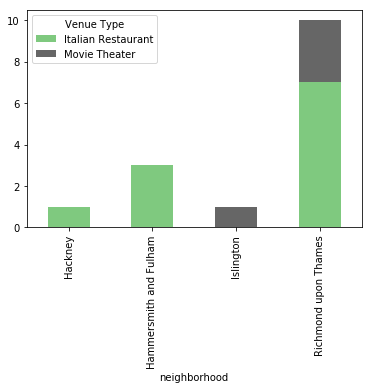

In [29]:
df_venues_final.groupby('neighborhood')['Venue Type']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, colormap = 'Accent')

### Neighborhood selected for my friend is Richmond Upon Thames

In [28]:
#define object 'Richmond upon Thames' index 26 
neighborhood_latitude = geo.loc[26, 'latitude'] # neighborhood latitude value
neighborhood_longitude = geo.loc[26, ' longitude'] # neighborhood longitude value
neighborhood_name = geo.loc[26, 'Area'] # neighborhood name

map_richmond = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(df_richmond['lat'], df_richmond['lng'], df_richmond['name'], df_richmond['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='green',
      fill=True,
      fill_color='yellow',
      fill_opacity=0.7).add_to(map_richmond) 
    
map_richmond